In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from surprise import Reader
from surprise import Dataset

import tensorflow_hub

# Collaborative Filtering Recommender System
In this lab session, we will work with the training set created last week.

## Exercise 1
In this exercise, we are going to predict the rating of a single user-item pair using a neighborhood-based method.
### 1.1
- Represent the ratings from the training set in a user-item matrix where the rows represent users and the columns represent items.
- Fill unobserved ratings with $0$.

Compute the cosine similarities between the user with 'reviewerID'='A25C2M3QF9G7OQ' and all users that have rated the item with 'asin'='B00EYZY6LQ'.<br>
What are the similarities and what are the ratings given by these users on item 'B00EYZY6LQ'?

In [ ]:
cosine_similarities = cosine_similarity()

### 1.2
Predict the rating for user 'A25C2M3QF9G7OQ' on item 'B00EYZY6LQ' based on the ratings from the $3$ most similar users, using a weighted (by similarity) average. What is the prediction?

## Exercise 2
In this exercise, we are going to predict the rating of the same user-item pair as in exercise 1, now using a latent factor method.
### 2.1
- Represent the ratings from the training set in a user-item matrix where the rows represent users and the columns represent items.
- Subtract the row mean (i.e. mean rating per user) from each non-missing element in the matrix.
- Replace missing values with $0$.

Factorize the user-item matrix by performing Singular Value Decomposition (SVD) of rank $5$ using eigendecomposition. What is ther user factors of user 'A25C2M3QF9G7OQ' and the item factors of item 'B00EYZY6LQ'?

In [ ]:
Q, sigma, P = svds()

### 2.2
Predict the rating for user 'A25C2M3QF9G7OQ' on item 'B00EYZY6LQ' by taking the dot product between the user factors and item factors and adding back the mean rating of this user. What is the prediction?

<br>
<br>
For the rest of the exercises, you can use the python library Scikit-Surprise. Please find the documentation here: https://surprise.readthedocs.io/en/stable/getting_started.html. <br>
You can convert the training set to the format required in Scikit-Surprise as follows:

In [ ]:
reader = Reader(rating_scale=(1, 5))
training = Dataset.load_from_df(df_training[['reviewerID', 'asin', 'overall']], reader)

## Exercise 3
### 3.1
Define a user-based neighborhood model that takes into account the mean rating of each user.<br>
Use cosine as similarity measure and try to vary the (maximum) number of neighbors to take into account when predicting ratings. Keep Scikit-Surprise's default setting for all other parameters. <br>
Is it better to use $1$ or $10$ neighbors? You should determine this based on the Root Mean Square Error (RMSE) over 3-fold cross-validation.

### 3.2
Fit the neigborhood-based model defined in exercise 3.1 on the full training set with cosine as similarity measure and either $1$ or $10$ neighbors based on what you found to be better in exercise 3.1. Keep Scikit-Surprise's default setting for all other parameters, but set the random state to $0$ for comparable results. <br>
Use the model to predict the unobserved ratings for the users in the training set. How many predictions are there and what is the average of all the predictions?

## Exercise 4
### 4.1
Define an SVD model with user and item biases that uses Stochastic Gradient Descend (SGD) to estimate the low-rank matrix based on only observed ratings. <br>
Set the number of latent factors to $30$ and try to iterate the SGD procedure for different number of epochs. Keep Scikit-Surprise's default setting for all other parameters. <br>
Is it better to run for $100$ or $500$ epochs? You should determine this based on the RMSE over 3-fold cross-validation.

### 4.2
Fit the latent factor model defined in exercise 4.1 on the full training set with $30$ latent factors and run for either $100$ or $500$ epochs based on what you found to be better in exercise 4.1. Keep Scikit-Surprise's default setting for all other parameters, but set the random state to $0$ for comparable results.<br>
Use the model to predict the unobserved ratings for the users in the training set. How many predictions are there and what is the average of all the predictions?

In [ ]:
def get_tokens(temp):
    # Lower case it
    text2 = ' '.join(temp['title'].astype(str)).lower()

    # remove words that are numbers, punctuations or words with mixture of both
    no_punctuation = "".join((char if char.isalpha() else " ") for char in text2).split()
    tokens = word_tokenize(' '.join(no_punctuation))
    return no_punctuation

tokens = get_tokens(temp)
# count = Counter(tokens)
# print(count.most_common(10))

# tokens = get_tokens(temp)
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)
# print(count.most_common(100))

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(filtered, stemmer)
count_stemmed = Counter(stemmed)
# print(count.most_common(100))

print('Vocabulary size after preprocessing: ', len(count_stemmed))



Vocabulary size after preprocessing:  659


Represent each product in the TF-IDF vector space.

In [ ]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

for subdir, dirs, files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        shakes = open(file_path, 'r')
        text = shakes.read()
        lowers = text.lower()
        no_punctuation = lowers.translate(None, string.punctuation)
        token_dict[file] = no_punctuation
        
#this can take some time
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

NameError: name 'path' is not defined

In [ ]:
def clean_tokens(temp):
    
    temp['lol'] = temp["title"].str.lower()#.apply(nltk.word_tokenize)
    # temp['lol2'] = "".join((char if char.isalpha() else " ") for char in temp['lol']).split()

    # temp['lol2'] = map(lambda x: x.isalpha(), temp['lol1'])

    temp['lol2'] = temp.lol.str.replace('[^a-zA-Z]', ' ')

    temp['stems'] = stem_tokens(temp['lol2'], stemmer)

    return temp

coisa = clean_tokens(temp)

C:\Users\franc\AppData\Local\Temp\ipykernel_35740\1760358497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['lol'] = temp["title"].str.lower()#.apply(nltk.word_tokenize)
C:\Users\franc\AppData\Local\Temp\ipykernel_35740\1760358497.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  temp['lol2'] = temp.lol.str.replace('[^a-zA-Z]', ' ')
C:\Users\franc\AppData\Local\Temp\ipykernel_35740\1760358497.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te

In [ ]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [ ]:
my_stopwords = open("my_own_stopwords.txt", "r").read().splitlines()
stoppy = tokenize(' '.join(my_stopwords))

#this can take some time
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stoppy)
tfs = tfidf.fit_transform(coisa['stems'])


C:\Users\franc\miniconda3\envs\snowflakes\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'cau', 'cour', 'el', 'elsewh', 'everywh', 'ind', 'obviou', 'otherwi', 'plea', 'somewh'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [ ]:
tfs_matrix = tfs.todense().shape

tfs.get_features_names()

tfs_df = pd.DataFrame(tfs_matrix, index= tfidf.get_feature_names(), columns= coisa['asin'])

(801, 640)

In [ ]:
tfidf.get_feature_names()


['access',
 'account',
 'acroni',
 'activ',
 'address',
 'adob',
 'advanc',
 'advantag',
 'advisor',
 'aftershot',
 'age',
 'amazon',
 'america',
 'amp',
 'android',
 'anim',
 'anniversari',
 'anti',
 'antispywar',
 'antiviru',
 'anytim',
 'apach',
 'appl',
 'aquasoft',
 'archi',
 'architect',
 'architectur',
 'art',
 'asf',
 'atla',
 'audio',
 'autocad',
 'autodesk',
 'avast',
 'avg',
 'avi',
 'avira',
 'awar',
 'award',
 'awvd',
 'backup',
 'basic',
 'beacon',
 'bento',
 'betternet',
 'biofeedback',
 'bit',
 'bitdefend',
 'blackmoor',
 'block',
 'blue',
 'bonu',
 'book',
 'booster',
 'boot',
 'box',
 'brighter',
 'britannica',
 'broderbund',
 'bronz',
 'brother',
 'budget',
 'builder',
 'bundl',
 'burn',
 'busi',
 'cal',
 'camera',
 'canyon',
 'car',
 'card',
 'cc',
 'ccleaner',
 'cd',
 'cf',
 'check',
 'checkbook',
 'chief',
 'chines',
 'chronicl',
 'cillin',
 'citi',
 'clean',
 'cleaner',
 'click',
 'clipart',
 'clock',
 'cloud',
 'cod',
 'code',
 'colorvis',
 'commerci',
 'commun'

In [ ]:
# model = Doc2Vec( min_count=1, epochs = 20)
model = Doc2Vec( negative = 10, window=2, min_count=1, workers=8, epochs = 40)

#build vocab
model.build_vocab(card_docs)

#train model
model.train(card_docs, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
# generate vectors
card2vec = [model.infer_vector(pre_embe['clean_text'][i].split(' ')) for i in range(0,len(pre_embe['clean_text']))]
card2vec

[array([-0.05188926,  0.01756967,  0.00080304, -0.01644716, -0.00975422,
        -0.15223429,  0.0766019 ,  0.1743951 , -0.07851344, -0.11406732,
        -0.11579873, -0.1918491 , -0.00294397,  0.08008995,  0.03790126,
        -0.10517821,  0.0397986 , -0.03871255,  0.04120843, -0.16442998,
         0.01272421, -0.06059873, -0.02271472, -0.04692448,  0.0019588 ,
         0.01832572, -0.07093579, -0.13738641, -0.11368976, -0.1378807 ,
         0.13310842,  0.1398528 , -0.04311813,  0.02634854, -0.02998282,
         0.12656415, -0.04626385, -0.06957596, -0.03182952, -0.13092645,
        -0.01515466, -0.07072239, -0.05999961, -0.10808536,  0.02351224,
        -0.02629776, -0.0484005 ,  0.02058819,  0.01716644,  0.08433011,
         0.05025363,  0.0353669 ,  0.05234242,  0.05302617, -0.09678225,
         0.14274217,  0.00188098, -0.02729865, -0.07871447,  0.01949618,
         0.04429224,  0.05942415, -0.04763473, -0.06384027, -0.15286854,
         0.06605285,  0.09477046,  0.07137362, -0.0

In [ ]:
len(card2vec)

801

In [ ]:
#Create a list of lists
dtv= np.array(card2vec).tolist()
#set list to dataframe column
pre_embe['card2vec'] = dtv
pre_embe.head(2)

,index,category,tech1,description,fit,title,also_buy,tech2,brand,feature,...,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,clean_text,card2vec
0,88,[],,[This complete training program from Adobe Pre...,,Learn Adobe Photoshop Lightroom 3 by Video,[],,Peach Pit Press,[],...,Software,,</div>,$24.99,0321700945,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,learn adobe photoshop lightroom 3 video,"[-0.05188925564289093, 0.017569666728377342, 0..."
1,89,[],,[This complete training program from Adobe Pre...,,Learn Adobe Dreamweaver CS5 by Video: Core Tra...,[],,Peach Pit Press,[],...,Software,,</div>,$35.23,0321719816,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN,learn adobe dreamweaver cs5 video core trainin...,"[-0.1290702074766159, 0.033048249781131744, -0..."


In [ ]:
type(card2vec[45])

numpy.ndarray

In [ ]:
# card2vec_cos_sim = cosine_similarity(pre_embe['card2vec'], pre_embe['card2vec'])#.shape
import seaborn as sns

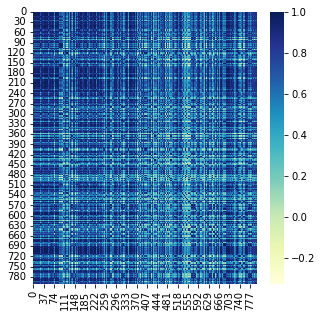

In [ ]:
labels = [headline[:20] for headline in pre_embe['asin']]
 
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  # df.columns = pre_embe['title']
  # df.index = pre_embe['title']
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

create_heatmap(cosine_similarity(card2vec))

In [ ]:
create_heatmap(cosine_similarity(card2vec))

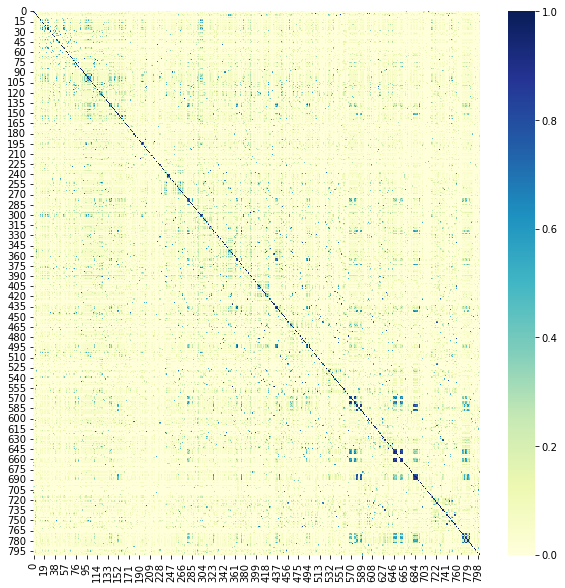

In [ ]:
# preprocessed['tfidf'] = hero.tfidf(preprocessed['clean_text'], max_features=3000

preprocessed['tf_idf_matrix'] = (hero.tfidf(preprocessed['clean_text'], max_features=640))
coisa = np.array(preprocessed['tf_idf_matrix'].values.tolist())
create_heatmap(cosine_similarity(coisa))


In [ ]:


coisa = np.array(preprocessed['tf_idf_matrix'].values.tolist())

coisa.shape

(801, 500)

In [ ]:
creacosine_similarity(coisa)

array([[1.        , 0.40145301, 0.35067232, ..., 0.        , 0.        ,
        0.        ],
       [0.40145301, 1.        , 0.76062959, ..., 0.        , 0.        ,
        0.        ],
       [0.35067232, 0.76062959, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.82292738],
       [0.        , 0.        , 0.        , ..., 0.        , 0.82292738,
        1.        ]])

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

#tokenize and tag the card text
card_docs = [TaggedDocument(doc.split(' '), [i]) 
             for i, doc in enumerate(pre_embe.clean_text)]
#display the tagged docs
card_docs

[TaggedDocument(words=['learn', 'adobe', 'photoshop', 'lightroom', '3', 'video'], tags=[0]),
 TaggedDocument(words=['learn', 'adobe', 'dreamweaver', 'cs5', 'video', 'core', 'training', 'web', 'communication'], tags=[1]),
 TaggedDocument(words=['learn', 'adobe', 'flash', 'professional', 'cs5', 'video', 'core', 'training', 'rich', 'media', 'communication'], tags=[2]),
 TaggedDocument(words=['microsoft', 'office', '365', 'home', '1', 'year', 'subscription', '5', 'users', 'pc', 'mac', 'key', 'card'], tags=[3]),
 TaggedDocument(words=['niv', 'glo', 'premium', 'dvd', 'multi', 'device'], tags=[4]),
 TaggedDocument(words=['quicken', 'legal', 'business', 'pro', '2011', 'old', 'version'], tags=[5]),
 TaggedDocument(words=['quicken', 'willmaker', 'plus', '2011', 'old', 'version'], tags=[6]),
 TaggedDocument(words=['complete', 'national', 'geographic', 'every', 'issue', 'since', '1888'], tags=[7]),
 TaggedDocument(words=['spanish', 'levels', '1', '2', 'amp', '3'], tags=[8]),
 TaggedDocument(words=